## Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, _Xbox_ или _PlayStation_). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура _ESRB (Entertainment Software Rating Board)_ — это ассоциация, определяющая возрастной рейтинг компьютерных игр. _ESRB_ оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования

Выявить закономерности определяющие успешность игры. Это позволит прогнозировать продажи, сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Ход проекта
1. Ознакомимся с данными
2. Подготовим их для анализа
3. Проведем исследовательский анализ
4. Составим портрет пользователя каждого региона
5. Проверим гипотезы
6. Напишем общий вывод.



### Описание данных

-   _Name_ — название игры
-   _Platform_ — платформа
-   _Year_of_Release_ — год выпуска
-   _Genre_ — жанр игры
-   _NA_sales —_ продажи в Северной Америке (миллионы проданных копий)
-   _EU_sales_ — продажи в Европе (миллионы проданных копий)
-   _JP_sales_ — продажи в Японии (миллионы проданных копий)
-   _Other_sales —_ продажи в других странах (миллионы проданных копий)
-   _Critic_Score_ — оценка критиков (максимум 100)
-   _User_Score_ — оценка пользователей (максимум 10)
-   _Rating_ — рейтинг от организации _ESRB_ (англ. _Entertainment Software Rating Board)._ Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Обзор данных

In [1]:
# импортируем необходимые для работы модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
plt.rcParams["figure.figsize"] = (15,6)
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [3]:
# загрузим файл с данными в датафрейм
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
# посмотрим первые 10 строчек
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# посмотрим количество строк и столбцов
data.shape

(16715, 11)

In [6]:
# посчитаем количество пропусков в столбцах
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# выведем долю пропусков по каждому столбцу
data.isna().mean().round(2)

Name               0.00
Platform           0.00
Year_of_Release    0.02
Genre              0.00
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Critic_Score       0.51
User_Score         0.40
Rating             0.40
dtype: float64

In [8]:
# проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
# проверим на наличие дублей строк
data.duplicated().sum()

0

In [10]:
# выведем таблицу описания числовых столбцов
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


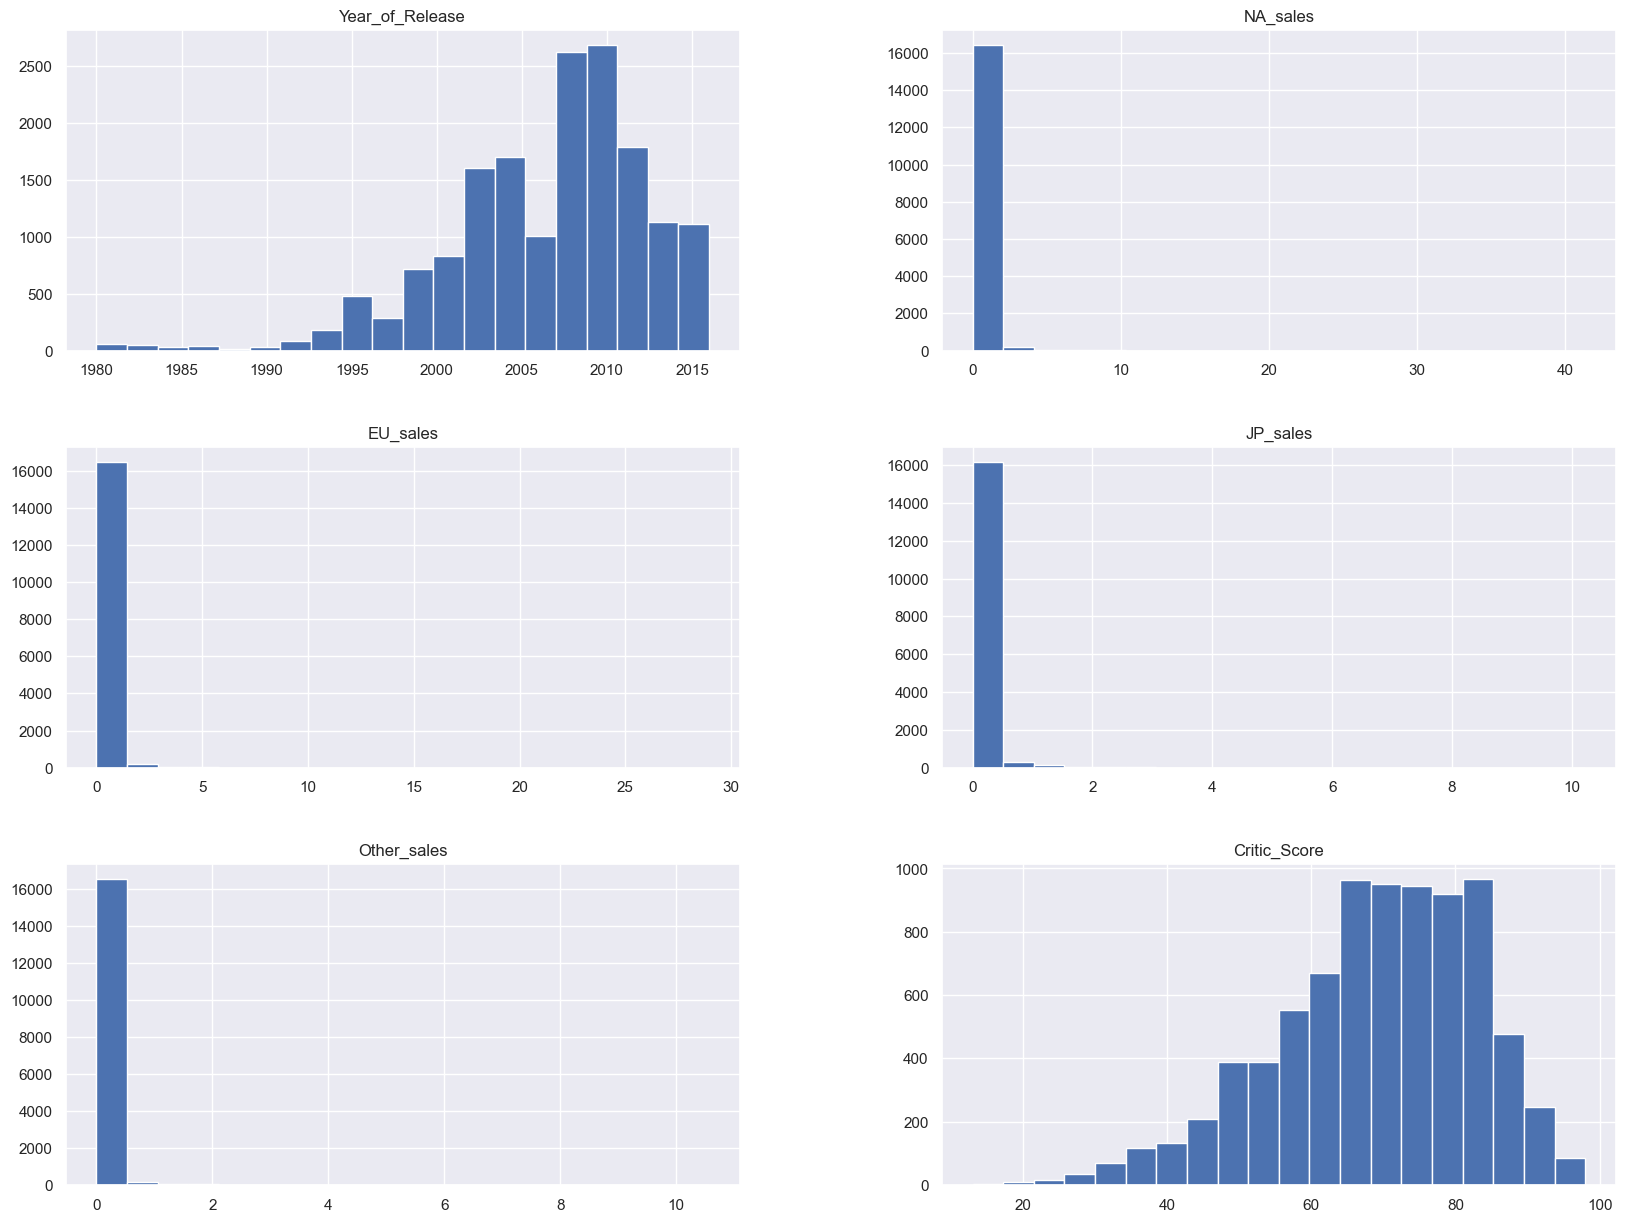

In [11]:
# посмотрим на распределение данных
data.hist(figsize=(20, 15), bins=20)
plt.show()

In [12]:
# посмотрим на уникальные значения в столце Platform
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
# посмотрим на уникальные значения в столце Genre
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [14]:
# посмотрим на уникальные значения в столце Rating
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
# посмотрим на уникальные значения в столце Name
data['Name'].value_counts().sort_values(ascending=False).head(20)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
Madden NFL 07                               9
FIFA 14                                     9
Madden NFL 08                               8
Angry Birds Star Wars                       8
Cars                                        8
LEGO Harry Potter: Years 5-7                8
LEGO The Hobbit                             8
FIFA Soccer 13                              8
The LEGO Movie Videogame                    8
LEGO Jurassic World                         8
FIFA 15                                     8
LEGO Star Wars II: The Original Trilogy     8
Lego Batman 3: Beyond Gotham                8
Monopoly                                    8
Terraria                                    8
Skylanders SWAP Force                       7
The Amazing Spider-Man 2 (2014)             7
Name: Name, dtype: int64

**Вывод:**
1. Необходимо исправить названия столбцов.
2. Исследовать пропуски и заполнить их, если это возможно.
3. Исправить тип данных столбца _User_Score_ на float.    
     _Year_of_Release_ -  на int. 
4. Нужно исследовать выбросы в столбцах связанных с продажами.
5. Изучить почему в столбце _Name_ есть много дублирующих строк.


## Предобработка данных

### Название столбцов

In [16]:
# исправим названия столбцов
data.columns =  data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Типы данных

In [17]:
# приведем столбец year_of_release к типу данных int
data['year_of_release'] = data['year_of_release'].astype('Int64') 
data['year_of_release'].dtypes

Int64Dtype()

In [18]:
# посмотрим на уникальные значения в столбце user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
# посмтотрим внимательнее на строки со значением 'tbd' в столбце user_score
data.query('user_score == "tbd"').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Значение **tbd** говорит о том, что данных для оценки пользователей еще мало. Поэтому заменим эти значения на маркер -1 и приведем столбец к типу данных *float*.  

In [20]:
data['user_score'] = data['user_score'].replace('tbd', -1).astype('float') 
data['user_score'].dtypes

dtype('float64')

### Обработка пропусков

In [21]:
# посмотрим на пропущенные значения в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [22]:
# удалим строки с пропусками в name. Таких строк мало, всего 2, и в них много пропусков в других столбцах.
data = data.drop(labels = [659, 14244],axis = 0)

In [23]:
# посмотрим, что представляют из себя строки с пропущенным значением year_of_release
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,-1.0,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Оставим эти строки и ничего с ними делать не будем. 

In [24]:
# посмотрим на строки с пропущенными значениями в столбцах critic_score, user_score, rating
data[data['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [25]:
data[data['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [26]:
data[data['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Оставим пропущенные значения в столбцах **critic_score, user_score**  как есть.

Рейтинг **ESRB** используется в Америке, Мексике и Канаде. Следовательно пропущенные значения это игры, к которым непосредственно этот рейтинг не присваивался. Вероятнее всего по причине, что такие игры не продаются в этих странах.

Заменим пропущенные значения в столбце **rating** на заглушку **'no_rating'**.

In [27]:
data['rating'] = data['rating'].fillna('no_rating')

In [28]:
# изучим почему у нас так много совпадающих названий
data[data['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,no_rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,no_rating
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,no_rating
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [29]:
data[data[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [30]:
data[data[['name', 'year_of_release', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [31]:
data[data['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [32]:
data[data['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,no_rating
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [33]:
# удалим строку дубль под номером 16230
data = data.drop(labels=[16230], axis=0)


In [34]:
# посмотрим на строки с пропущенными значениями в столбце year_of_release
data[data['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,no_rating
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,no_rating
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,-1.0,E
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [35]:
print('Процент пропущенных значений в столбце year_of_release:',
      round(data['year_of_release'].isna().sum()/len(data)*100, 2), '%')

Процент пропущенных значений в столбце year_of_release: 1.61 %


Так как процент пропущенных значений в столбце *year_of_release* не большой - удалим строки с пропущенными значениями.


In [36]:
data = data.query('year_of_release.notna()')

In [37]:
len(data)

16443

### Добавления столбца total_sales

In [38]:
# добавим новый столбец, сложив продажи по регионам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


**Вывод:**            

Исправили названия столбцов, удалили строки с отсутствием данных,  удалили один дубль.     

Пропущенные значения не стали заполнять, так как невозможно логически подобрать значения для заполнения. Наиболеее вероятно, что причинами пропусков в столбцах с оценками является отсутствие данных по оценкам. А вот пропуски в столбце year_of_release вероятнее всего следствие технической проблемы. 
    
Строки с пропущенными значениями в столбцах *critic_score,user_score, rating* оставили в датафрейме, так как эти строки имеют другие значения, которые понадобяться нам для анализа.   

Изучили причину дублей в столбце name. Дубли в названиях встречаются потому что игры с одинаковым названием выходили на разных платформах и в разные годы(переиздания). 

Рассчитали и добавили новый столбец - *total_sales*.

In [39]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

### Выпуск игр по годам

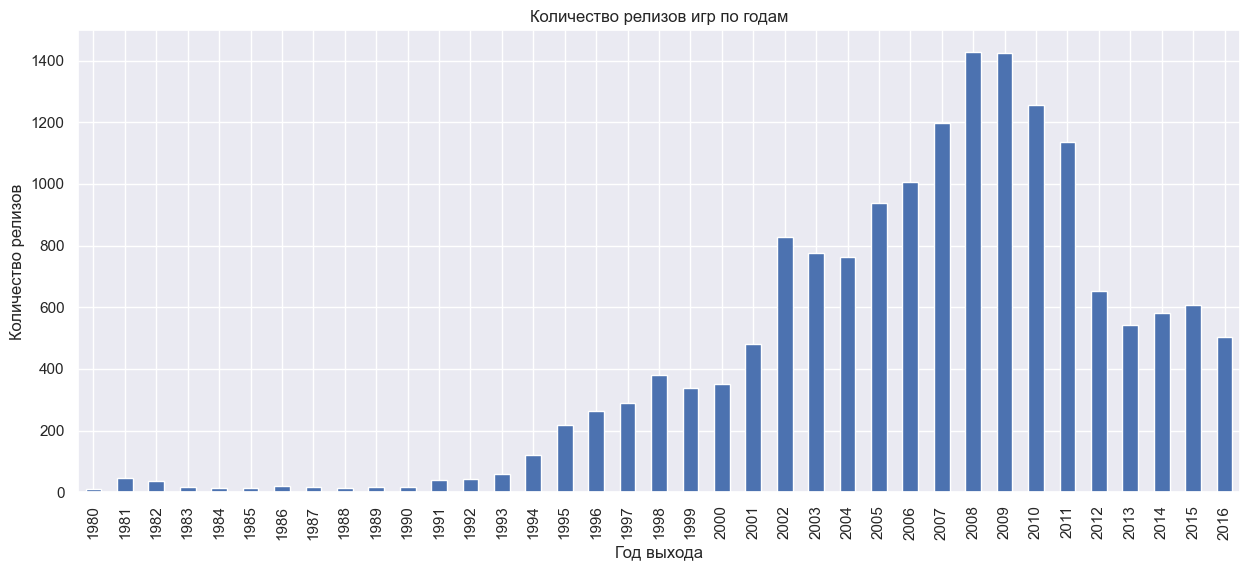

In [40]:
# постороим график распределения релизов по годам
games_per_year = data.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', title='Количество релизов игр по годам', xlabel = 'Год выхода' , grid=True, ylabel='Количество релизов')
plt.xticks(rotation=90)
plt.show()

**Вывод:**

У нас мало значений до 1993 года включительно. Также можно предположить, что эти данные старые по дате данные могут внести искажени в выводы, так как область компьютерных игр быстро развивается и более свежие данные позволят сделать более актуальные выводы.

### Анализ популярных платформ

In [41]:
# найдем топ 5 платформ по количеству продаж
games_per_platform = data.groupby('platform')['name'].count().sort_values(ascending=False).head(5)
games_per_platform

platform
PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
Name: name, dtype: int64

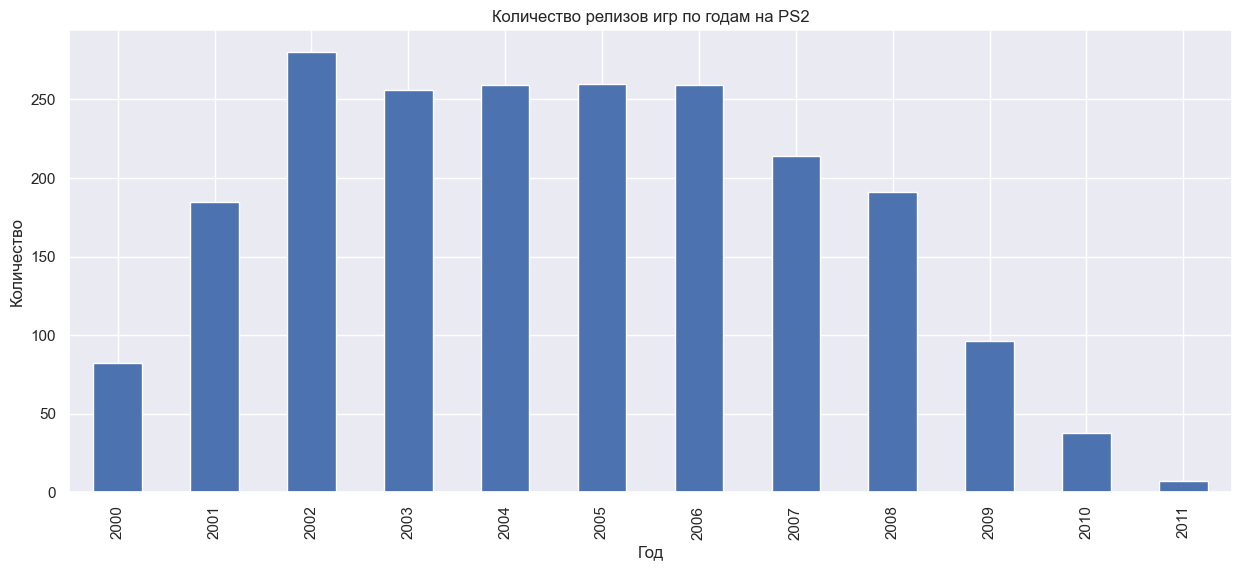

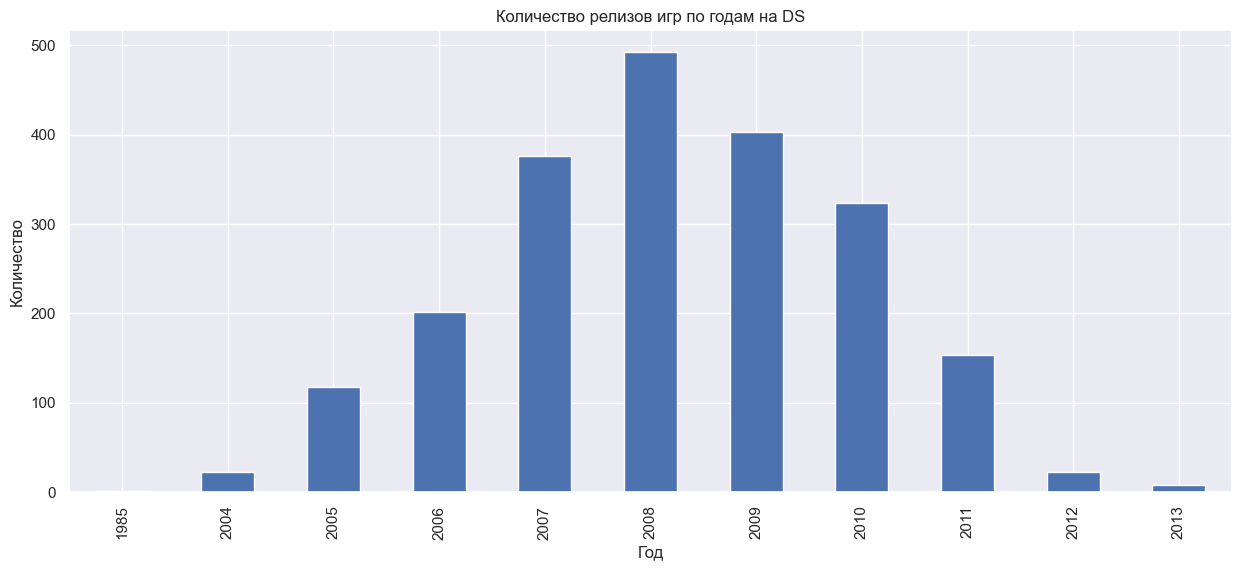

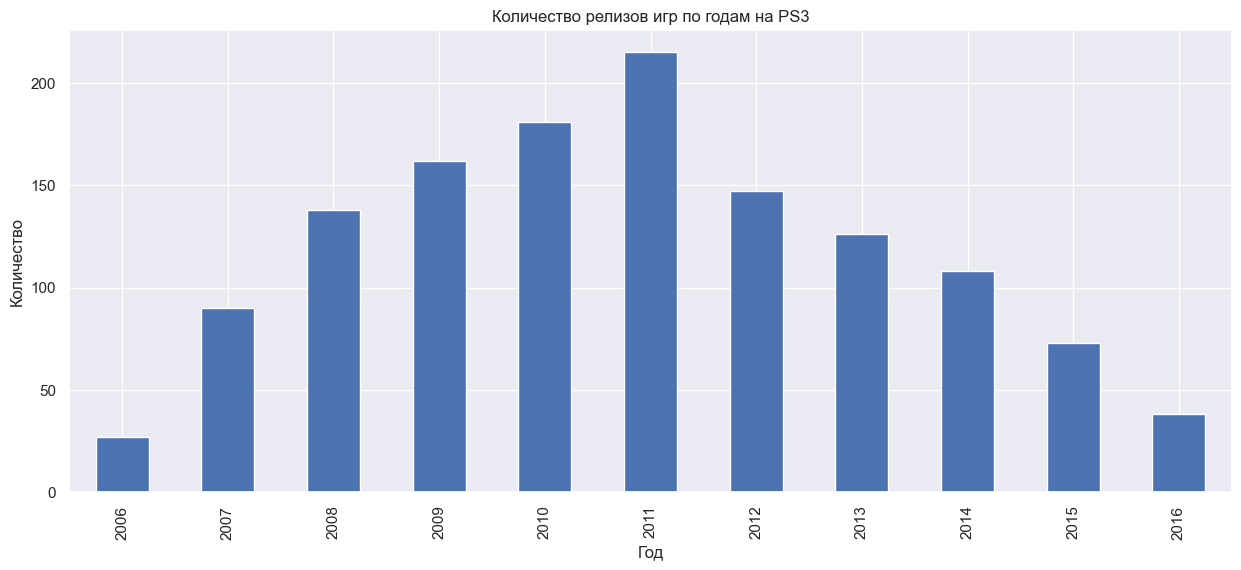

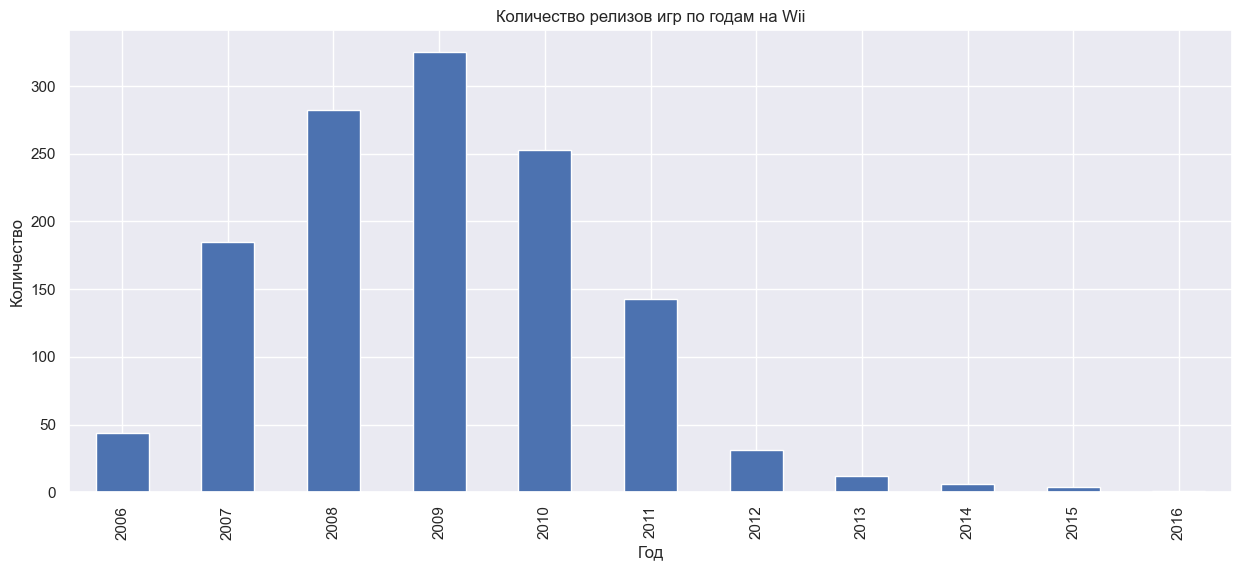

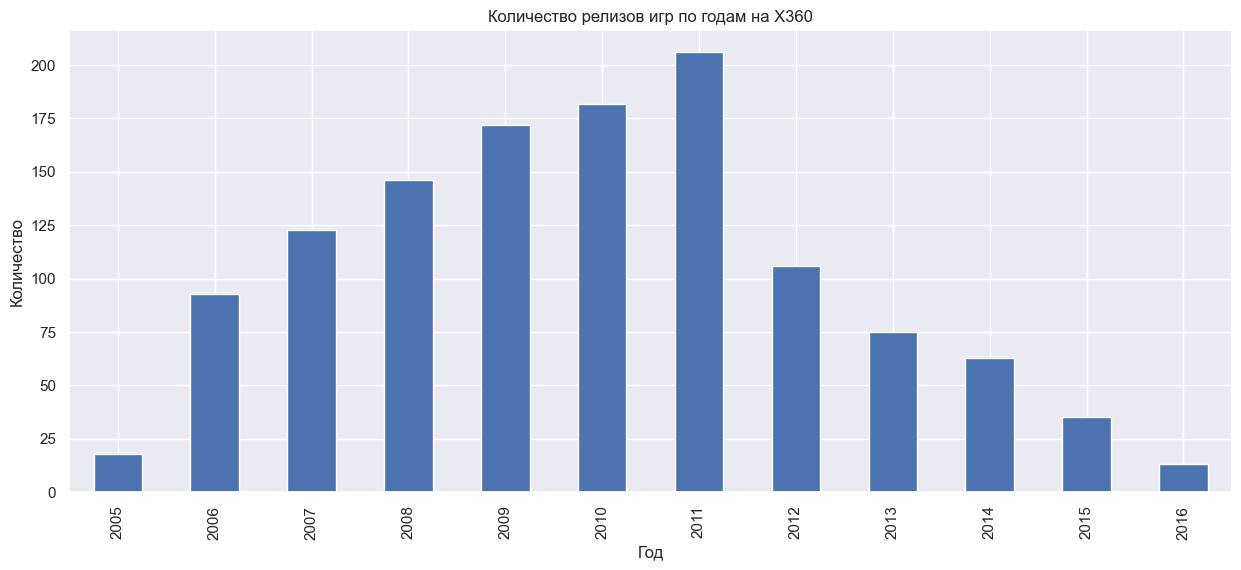

In [42]:
# построим графики для топ 5 платформ по годам
top_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360']
for platform in top_platforms:
    data[data['platform']==platform].groupby('year_of_release')['name'].count().plot(
        kind='bar', title='Количество релизов игр по годам на {}'.format(platform), xlabel='Год', ylabel='Количество'
    )
    plt.show()

На графике продаж на платформе DS мы видим значения за 1985 год. Тогда этой платформы не существовало. Посмотрим внимательнее на эти данные.

In [43]:
data.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


In [44]:
# удалим строку с ошибкой
data = data.drop(labels=[15957], axis=0)


In [45]:
len(data)

16442

**Вывод:**

В среднем рост продаж игр для платформы продолжается 5-7 лет. После этого продажи падают. Наблюдаем явный паттерн роста и падения продаж. Срок жизни платформы составляет примерно 10 лет.

Отсюда делаем вывод, что для прогноза продаж **нам понадобяться данные за последние 4 года, включая 2016**.

In [46]:
len(data)

16442

In [47]:
# сохраним данные с 2013 года в переменную data_2013
data_2013 = data.query('year_of_release >= 2013 ')
data_2013.shape

(2233, 12)

### Лидеры по продажам за актуальный период

In [48]:
# найдем самые свежие платформы. Они имеют наибольший потенциал. 
new_platform = data_2013.groupby('platform')['year_of_release'].min().dropna().sort_values(ascending=False)
new_platform

platform
3DS     2013
DS      2013
PC      2013
PS3     2013
PS4     2013
PSP     2013
PSV     2013
Wii     2013
WiiU    2013
X360    2013
XOne    2013
Name: year_of_release, dtype: Int64

In [49]:
# выберем топ платформ по продажам с 2009 года
total_sales_platform = data_2013.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(15)
total_sales_platform

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

**Вывод:**

Лидерами по продажам за актуальный период являються  **PS4, PS3, XOne**.


### Динамика продаж популярных платформ за актуальный период

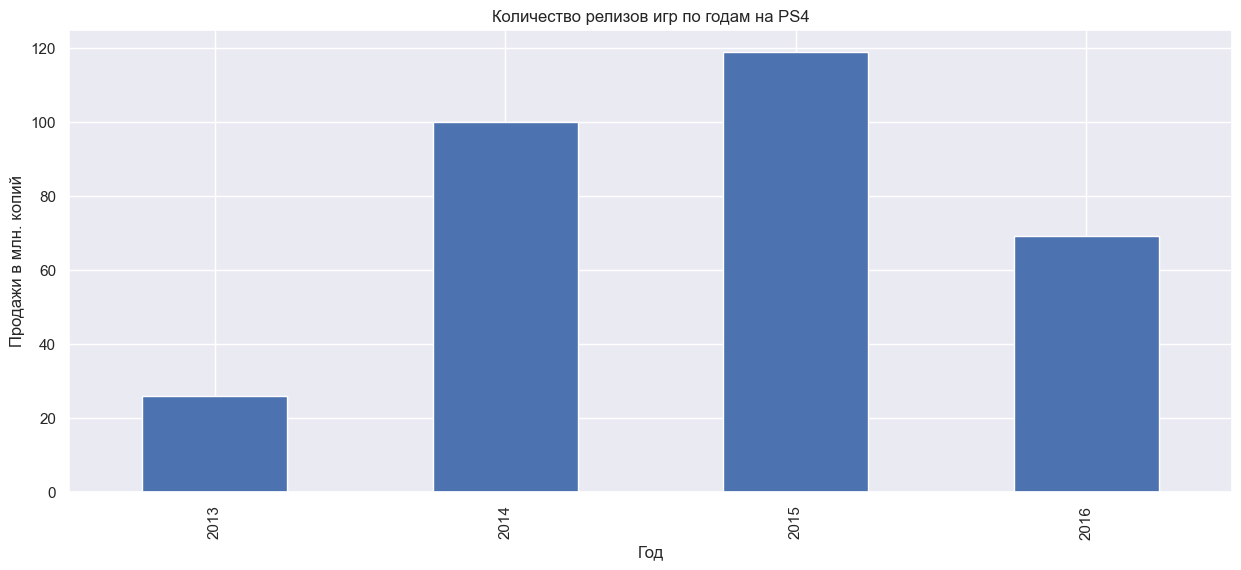

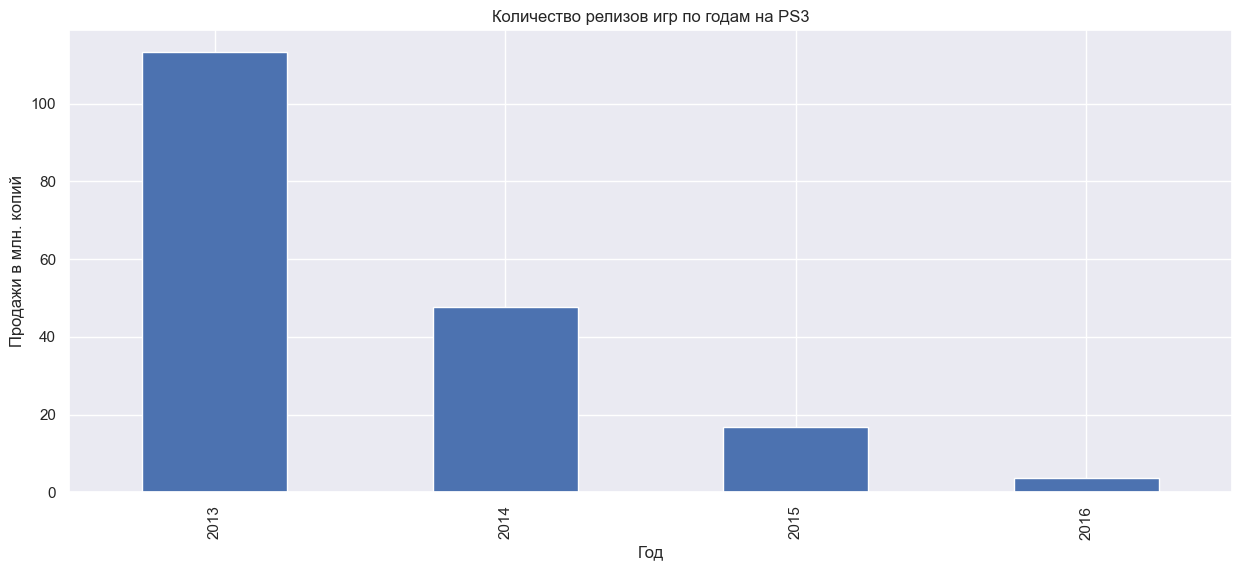

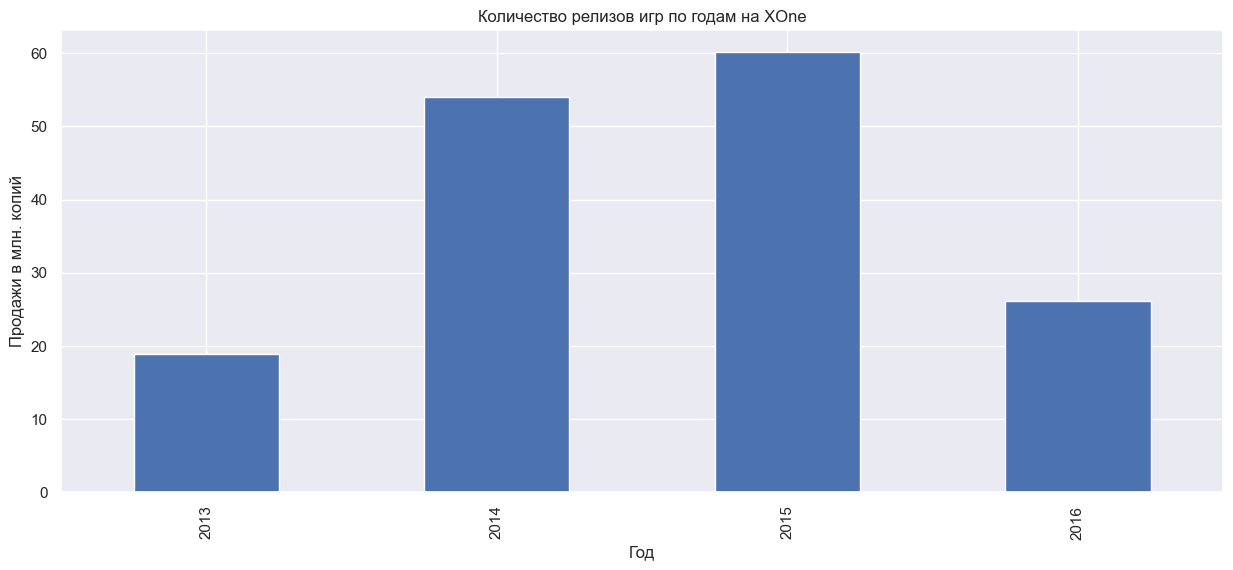

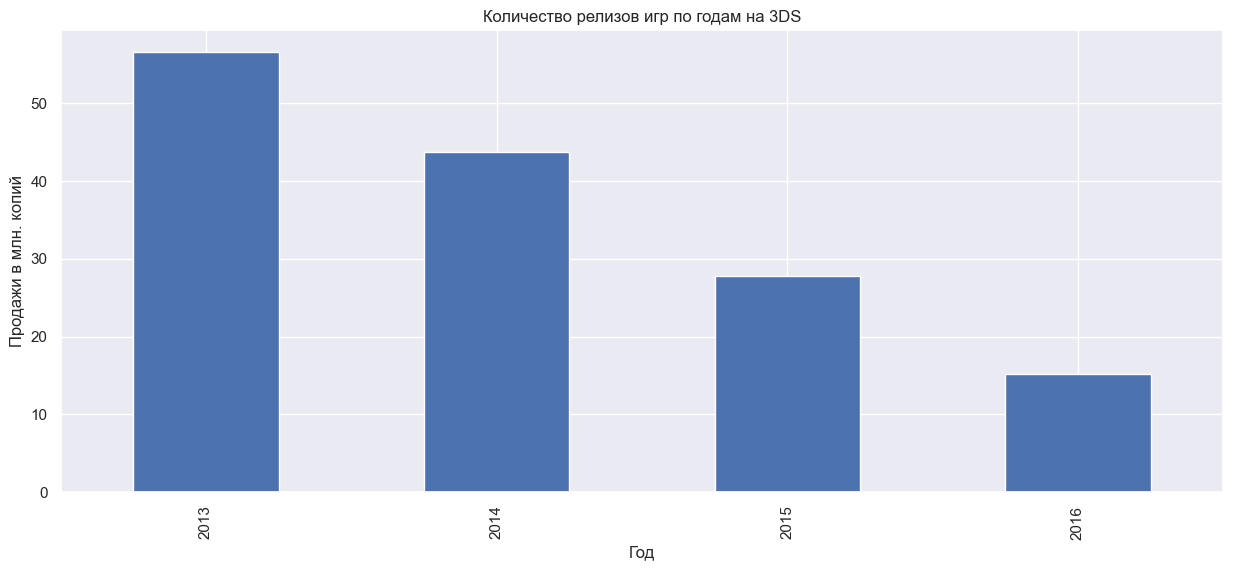

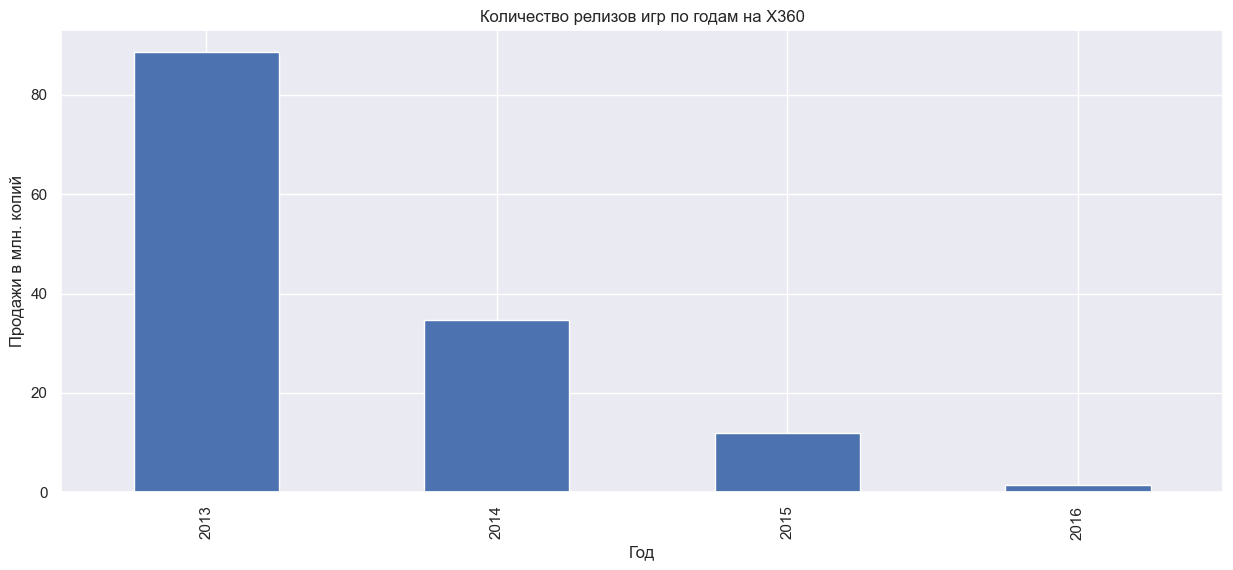

In [50]:
# построим графики для топ 5 новых платформ по годам
top_platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
for platform in top_platforms:
    data_2013[data['platform']==platform].groupby('year_of_release')['total_sales'].sum().plot(
        kind='bar', title='Количество релизов игр по годам на {}'.format(platform), xlabel='Год', ylabel='Продажи в млн. копий'
    )
    plt.show()

**Вывод:**

Графики по количеству проданных копий по годам подтверждают, что наиболее потенциально прибыльными являются **PS4 и XOne**. Их продажи растут.

В динамике продаж *PS3, 3DS, X360* наблюдается спад, отрицательная динамика.

### Продажи по платформам

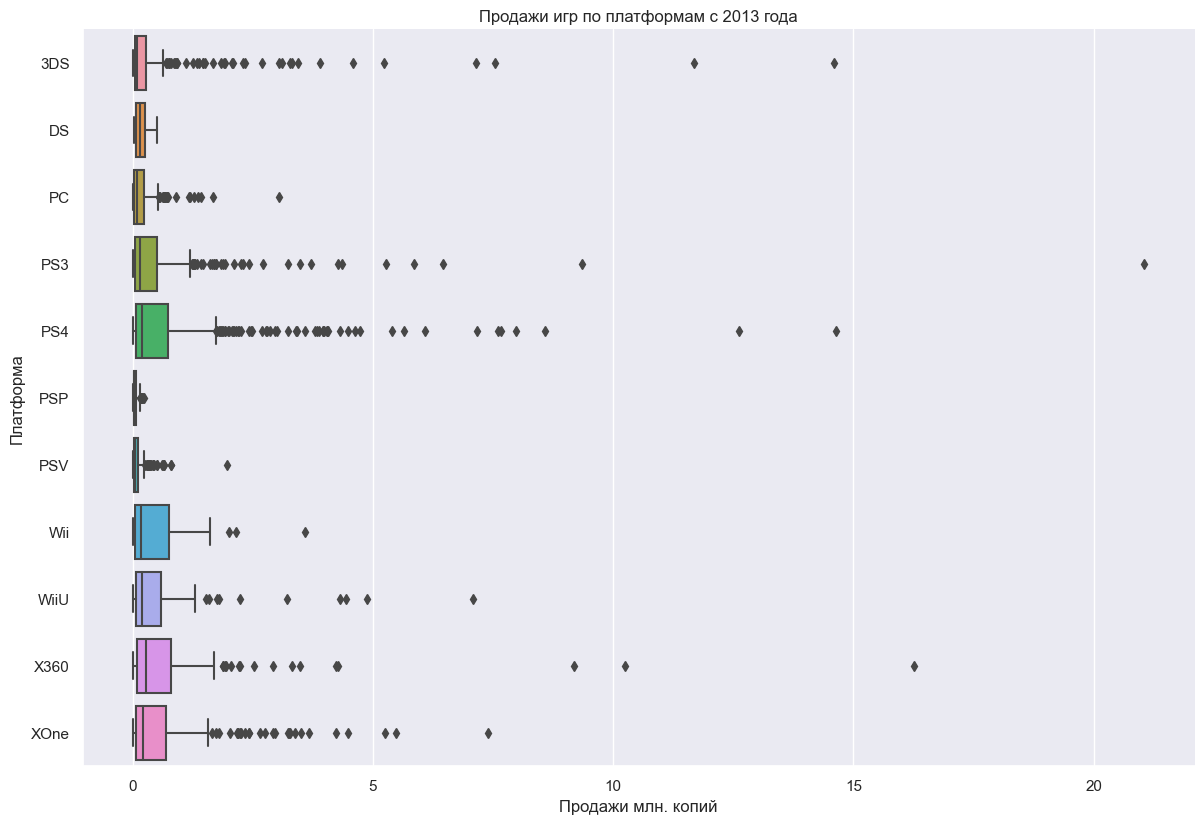

In [51]:
# построим распределение продаж по платформам с 2013 года
g = sns.catplot(data=data_2013, y='platform', x='total_sales', kind='box', height= 8 , aspect=1.5
                , order=new_platform.index)
g.set(title='Продажи игр по платформам с 2013 года', xlabel='Продажи млн. копий' , ylabel='Платформа')

В данных много выбросов. Это говорит нам о том, что распределение продаж игр имеет "длинные хвосты". Большая часть игр имеет относительно небольшие продажи, но есть много игр продажи которых намного больше средних и очень сильно влияют на общую сумму продаж.

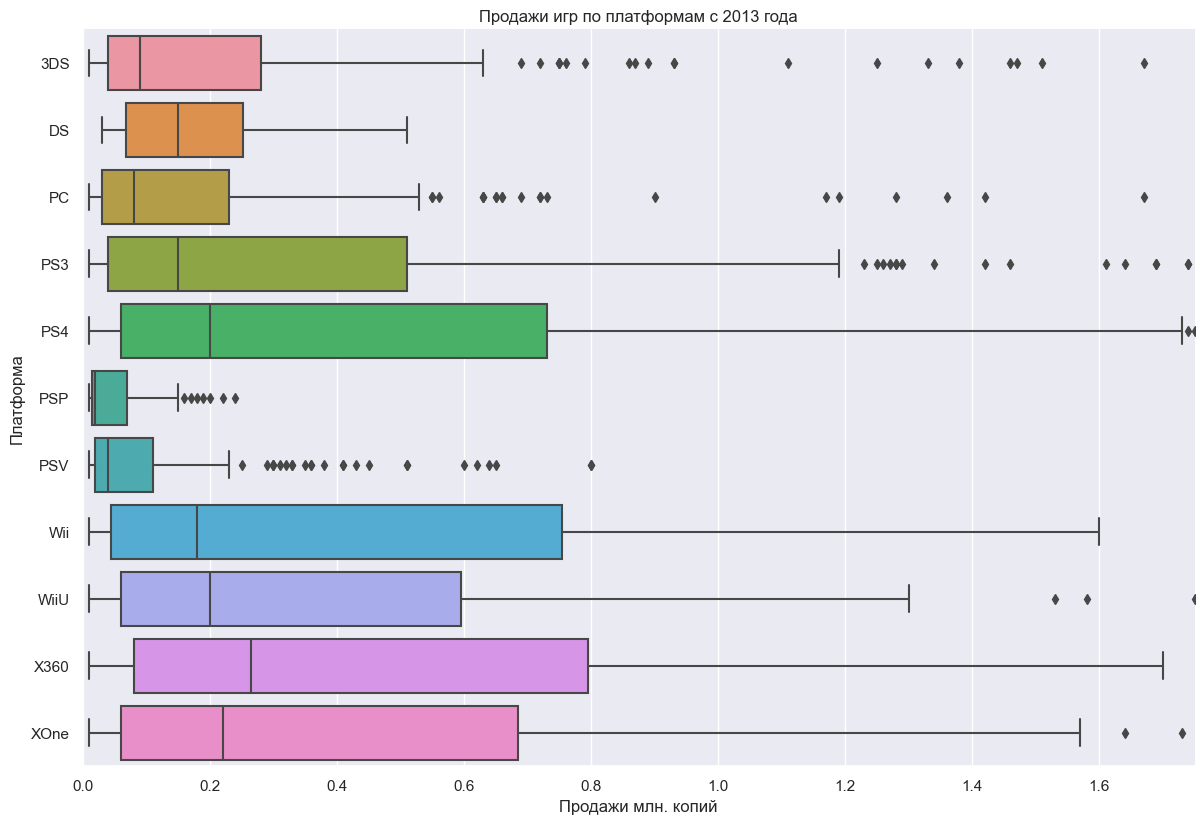

In [52]:
# уберем из графика хвосты, чтобы внимательнее рассмотреть распределение величин продаж
g = sns.catplot(data=data_2013, y='platform', x='total_sales', kind='box', height= 8 , aspect=1.5, order=new_platform.index)
g.set(xlim=(0, 1.75), title='Продажи игр по платформам с 2013 года', xlabel='Продажи млн. копий' , ylabel='Платформа')

**Вывод:**

Из современных платформ исходя из циклов жизни платформ и динамики продаж по годам перспектива есть только у двух - **PS4 и XOne**.

Также из построеных графиков четко прослеживается, что большую долю продаж делают "хиты" - игры, продажи по которым намного больше медианных.

### Зависимость между оценками и продажами

In [53]:
# Комментарий ревьюера
print(len(data_2013.query('platform == "PS4"  & user_score > 0')))
print(len(data_2013.query('platform == "PS4"  & critic_score > 0')))
print(len(data_2013.query('platform == "PS4"  & user_score > 0 & critic_score > 0')))

257
252
249


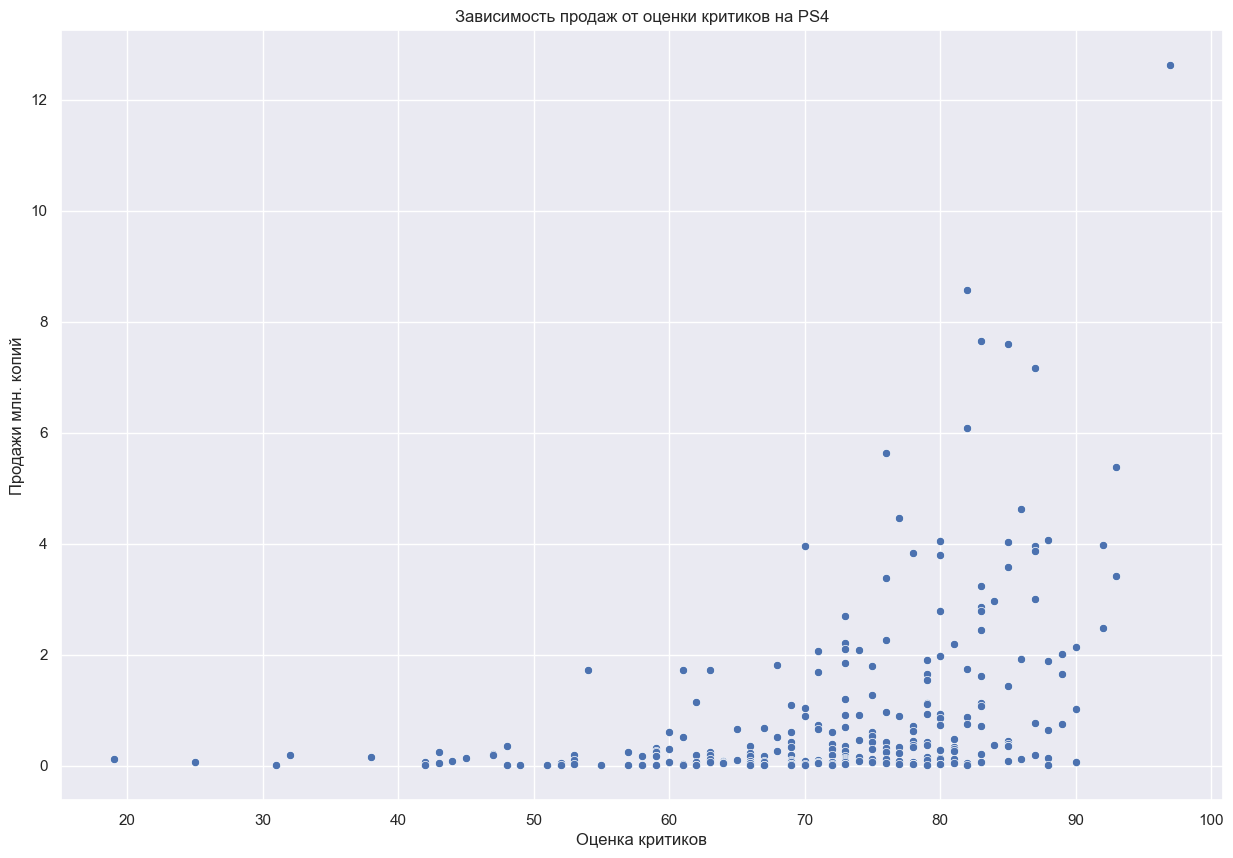

In [54]:
# построим графики зависимости продаж от оценок критиков и пользователей для платформы PS4
ps4_critic= data_2013.query('platform == "PS4" & critic_score > 0')
plt.figure(figsize=(15,10))
g = sns.scatterplot(data=ps4_critic, x="critic_score", y="total_sales")
g.set(title='Зависимость продаж от оценки критиков на PS4', ylabel='Продажи млн. копий' ,
      xlabel='Оценка критиков')
plt.show()

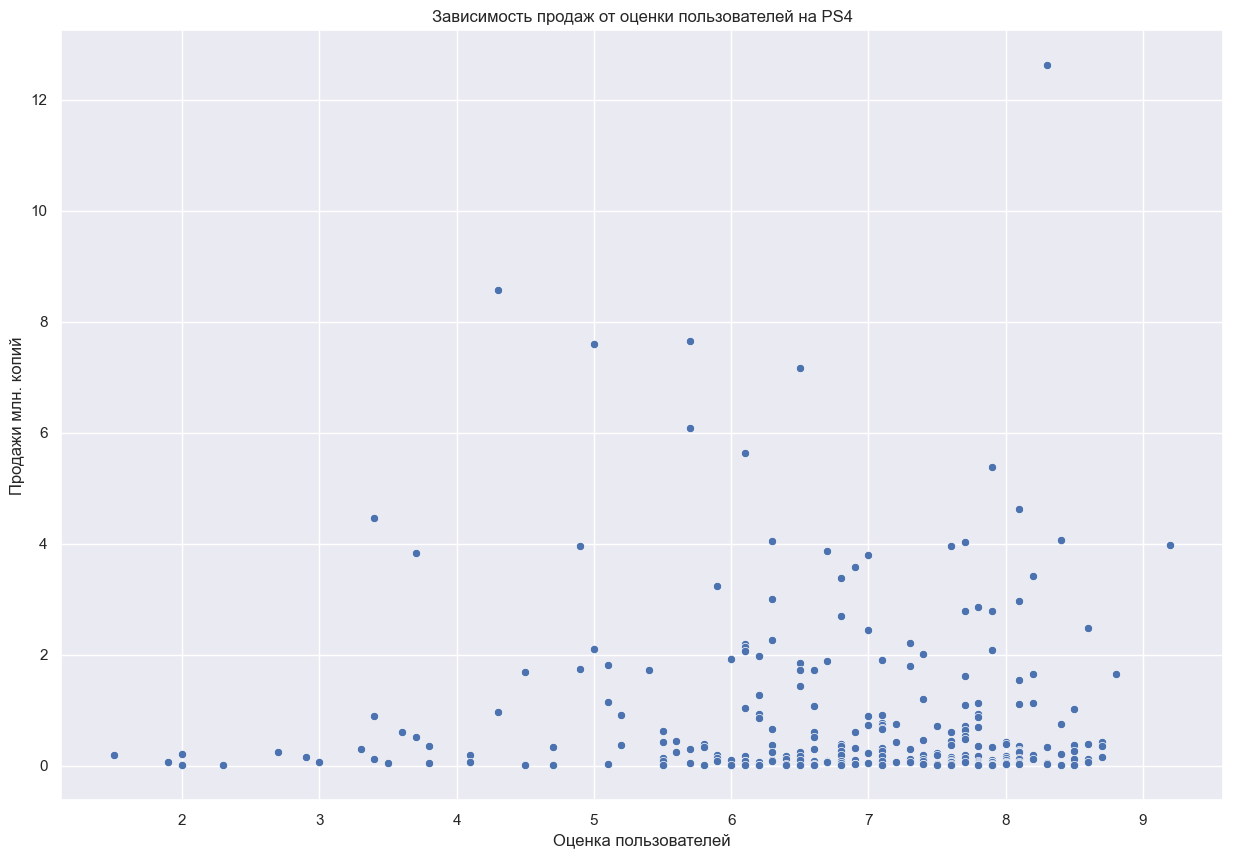

In [55]:
plt.figure(figsize=(15,10))
ps4_user = data_2013.query('platform == "PS4" & user_score > 0')
g = sns.scatterplot(data=ps4_user, x="user_score", y="total_sales")
g.set(title='Зависимость продаж от оценки пользователей на PS4', ylabel='Продажи млн. копий' ,
      xlabel='Оценка пользователей')
plt.show()

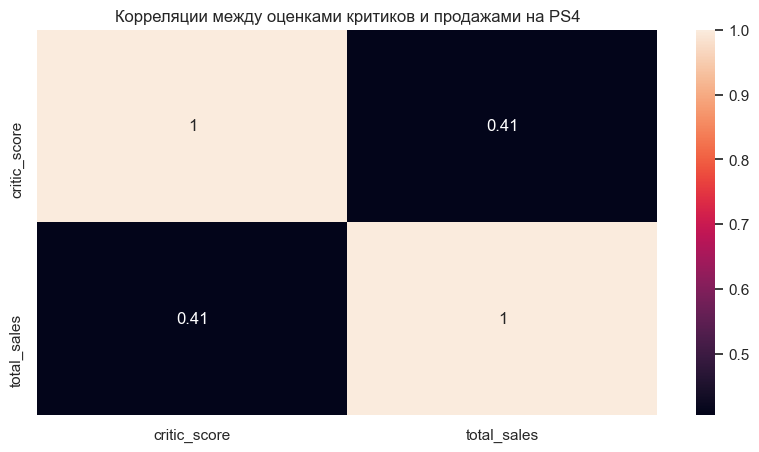

In [56]:
# найдем корреляции между оценками критиков и продажами для платформы PS4

plt.figure(figsize=(10,5))
g = sns.heatmap(ps4_critic[['critic_score', 'total_sales' ]].corr(), annot=True)
g.set(title='Корреляции между оценками критиков и продажами на PS4')
plt.show()

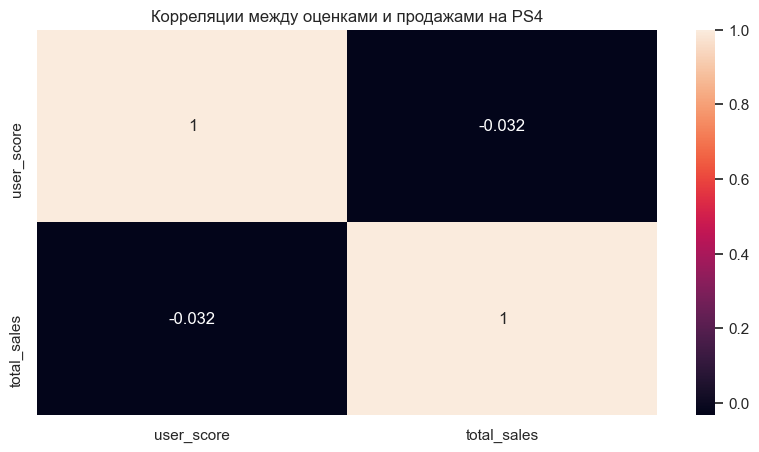

In [57]:
# найдем корреляции между отзвывами пользователей и продажами для платформы PS4
plt.figure(figsize=(10,5))
g = sns.heatmap(ps4_user[['user_score','total_sales' ]].corr(), annot=True)
g.set(title='Корреляции между оценками и продажами на PS4')
plt.show()

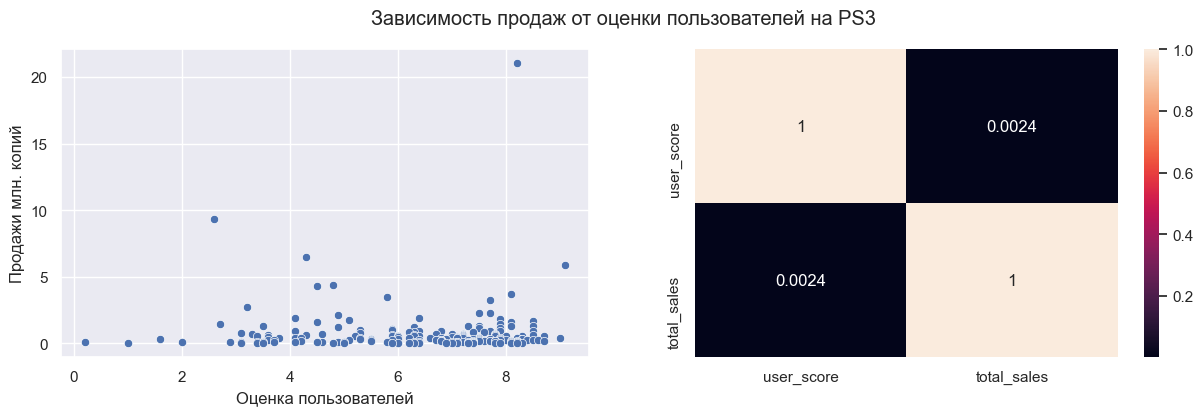

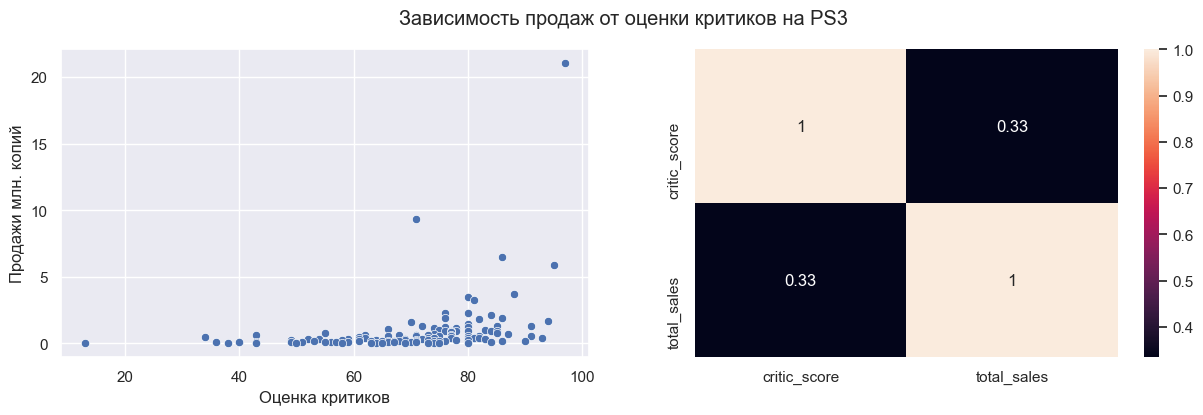

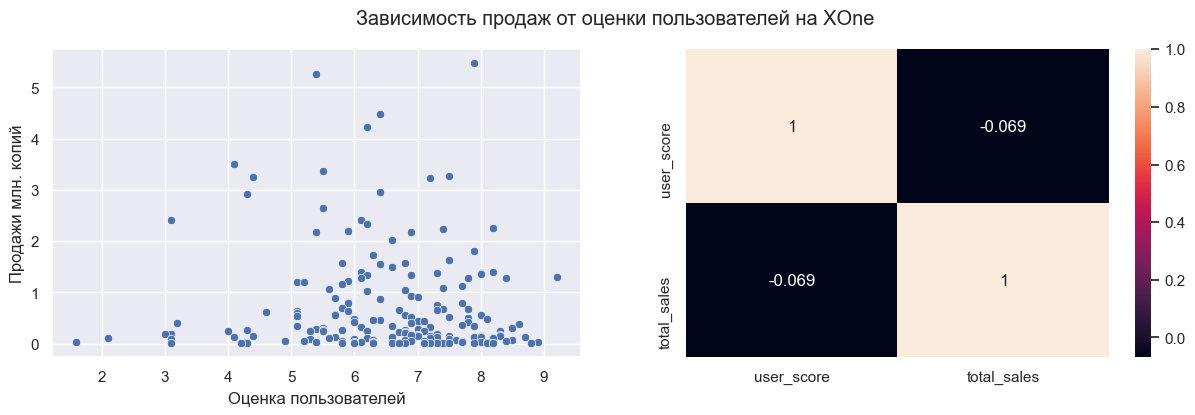

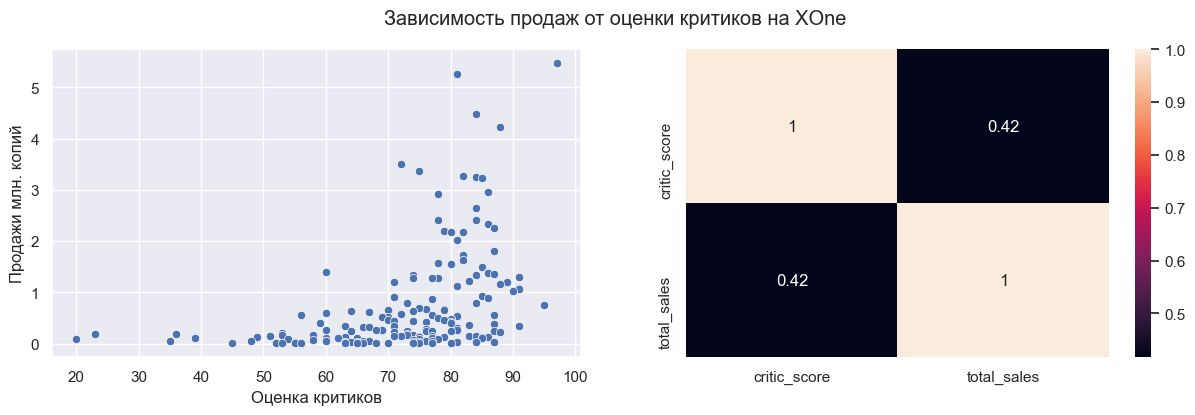

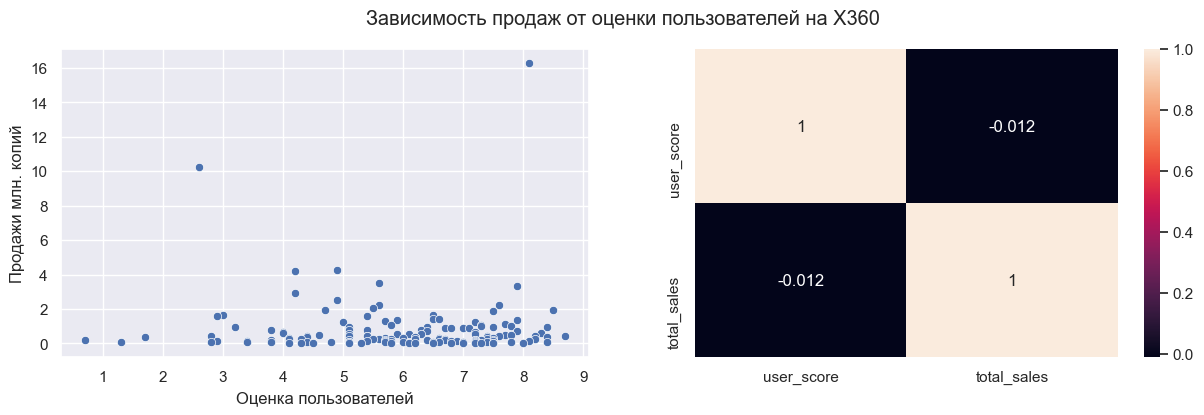

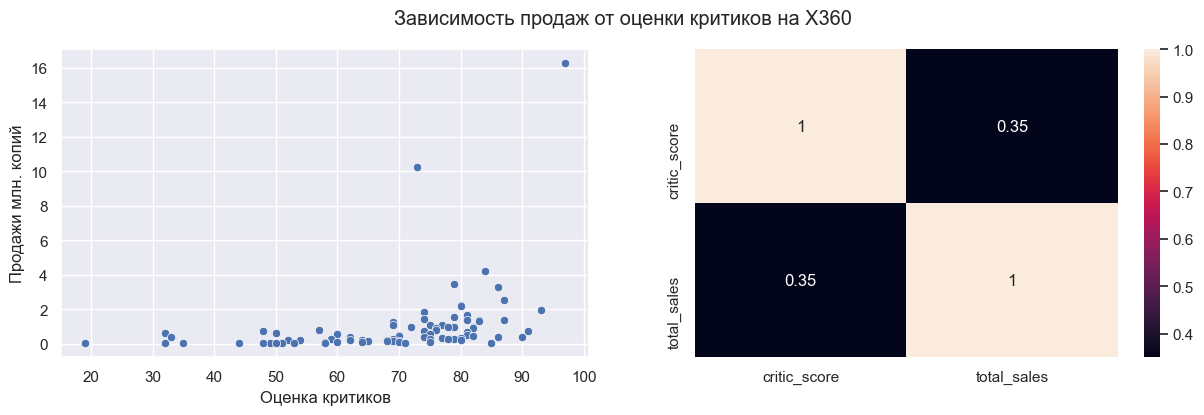

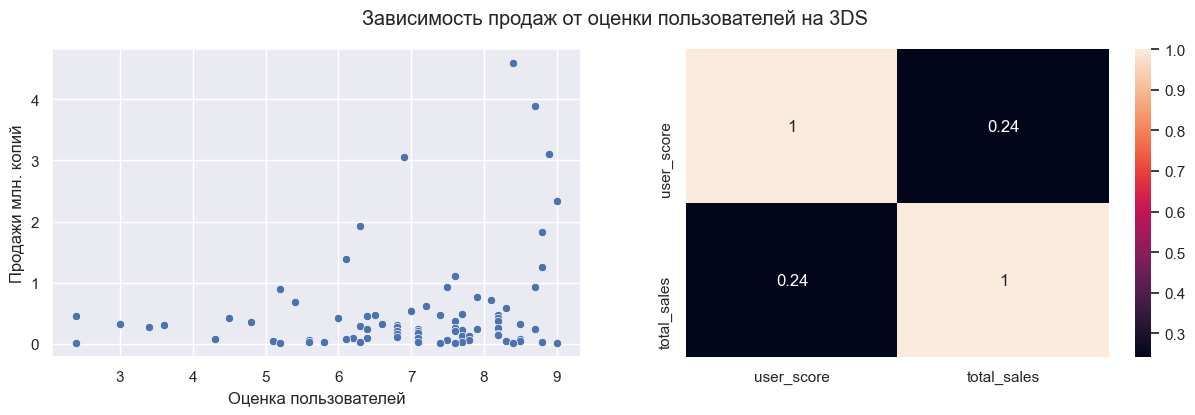

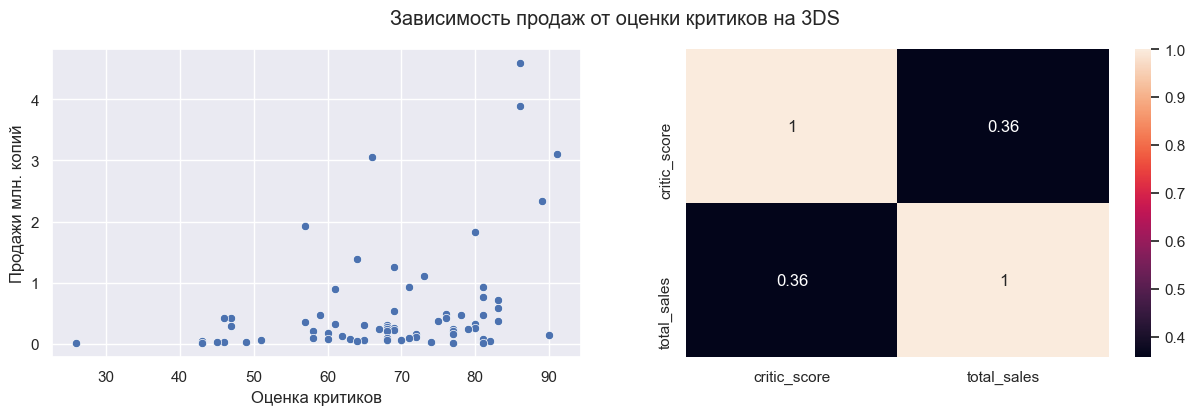

In [58]:
# найдем корреляции между отзвывами пользователей и продажами для платформ 'PS3', 'XOne', 'X360' , '3DS'

for platform in ['PS3', 'XOne', 'X360' , '3DS']:
    
    _critic= data_2013.query('platform == @platform & critic_score > 0')
    _user = data_2013.query('platform == @platform & user_score > 0')
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    fig.suptitle('Зависимость продаж от оценки пользователей на {}\n'.format(platform))
    a = sns.scatterplot(data=_user, x="user_score", y="total_sales", ax=axes[0])
    a.set(ylabel='Продажи млн. копий',
          xlabel='Оценка пользователей')
    b = sns.heatmap( _user[['user_score', 'total_sales' ]].corr(), annot=True, ax=axes[1])
   
    plt.show()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    fig.suptitle('Зависимость продаж от оценки критиков на {}\n'.format(platform))
    a = sns.scatterplot(data=_critic, x="critic_score", y="total_sales", ax=axes[0])
    a.set(ylabel='Продажи млн. копий' ,
      xlabel='Оценка критиков')
    b = sns.heatmap(_critic[['critic_score', 'total_sales' ]].corr(), annot=True, ax=axes[1])
    plt.show()
    

**Вывод:**

Судя по графикам рассеивания зависимость между оценками пользователей и критиков существует.

Хотя стоит отметить, что зависимость межу оценками критиков и продажами более явная, чем зависимость между оценками пользователей и продажами. 

### Зависимость между жанром и продажами

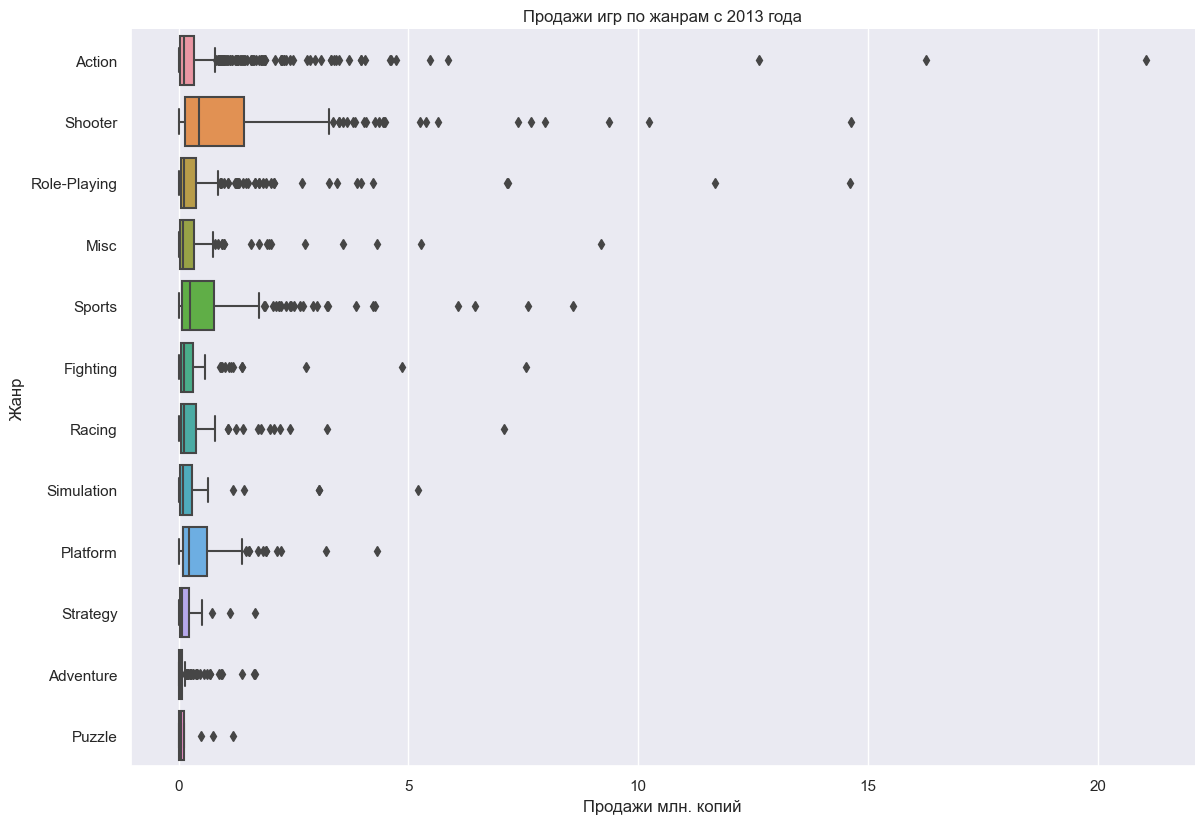

In [59]:
# построим графики зависимости между продажами и жанрами
g = sns.catplot(data=data_2013, y='genre', x='total_sales', kind='box', height= 8 , aspect=1.5)
g.set( title='Продажи игр по жанрам с 2013 года', xlabel='Продажи млн. копий' , ylabel='Жанр')
plt.show()

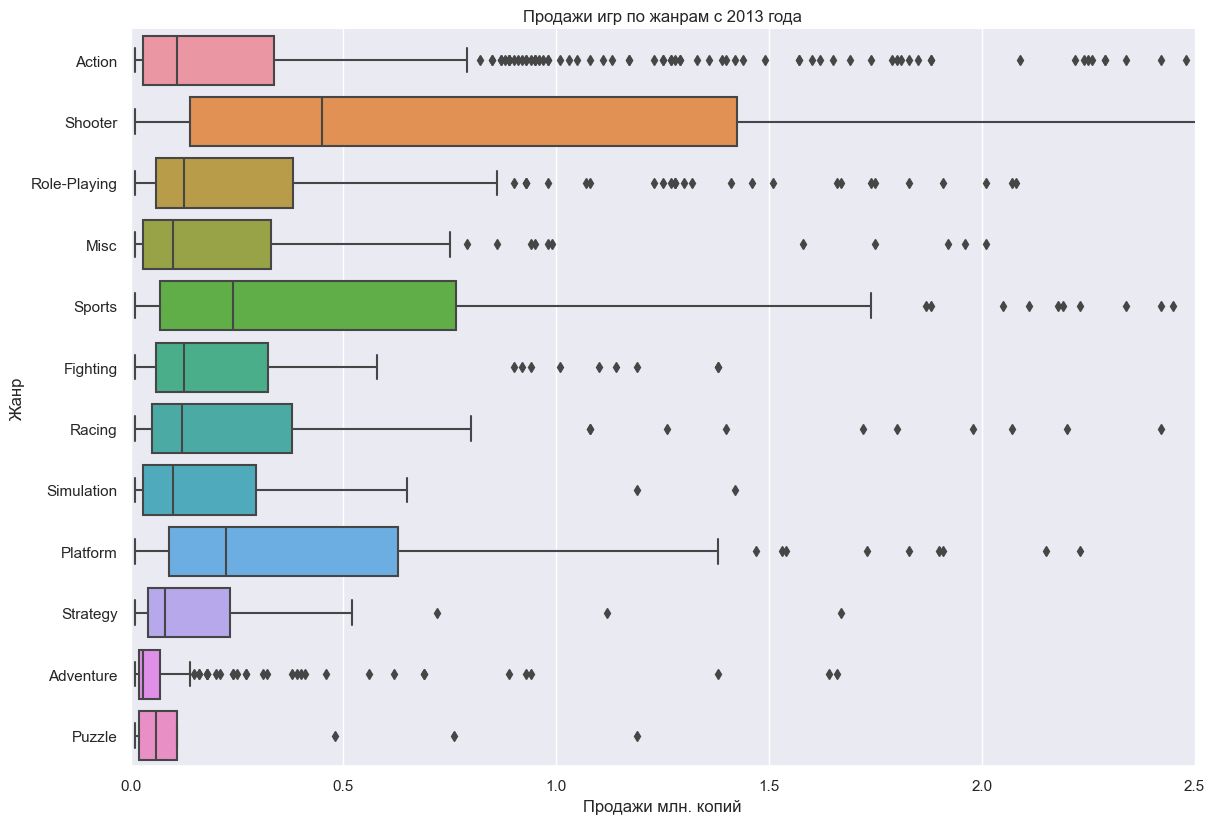

In [60]:
# уберем из графика хвосты, чтобы внимательнее рассмотреть распределение величин продаж
g = sns.catplot(data=data_2013, y='genre', x='total_sales', kind='box', height= 8 , aspect=1.5)
g.set(xlim=(0, 2.5), title='Продажи игр по жанрам с 2013 года', xlabel='Продажи млн. копий' , ylabel='Жанр')
plt.show()

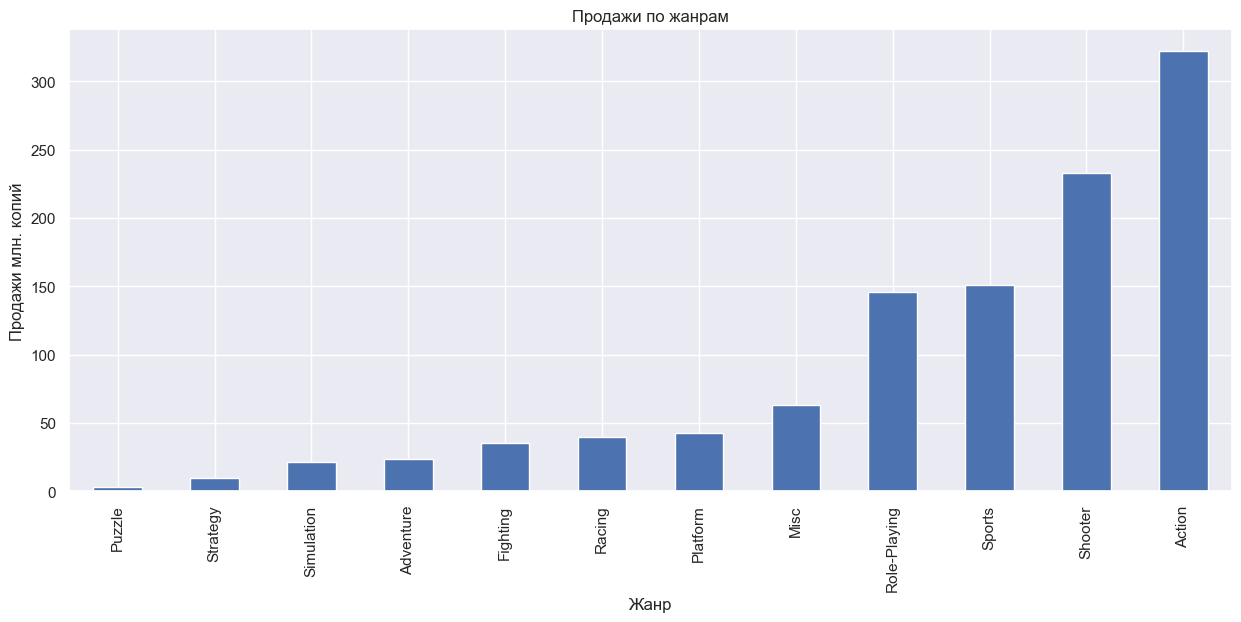

In [61]:
# построим графики по сумме продаж по жанрам
data_2013.groupby('genre')['total_sales'].sum().sort_values().plot(
        kind='bar', title='Продажи по жанрам', xlabel='Жанр', ylabel='Продажи млн. копий'
    )
plt.show()

**Вывод:**

Наименее популярными жанрами являются Puzzle, Adventure, Strategy.

Наиболее популярными жанры Platform, Shooter, Sports. Во всех жанрах много хитовых игр, значительно выделяющихся по количеству проданных копий. Поэтому прибыльность жанров мы оценивали по медиане.


## Портрет пользователей по регионам

### Топ платформ по регионам

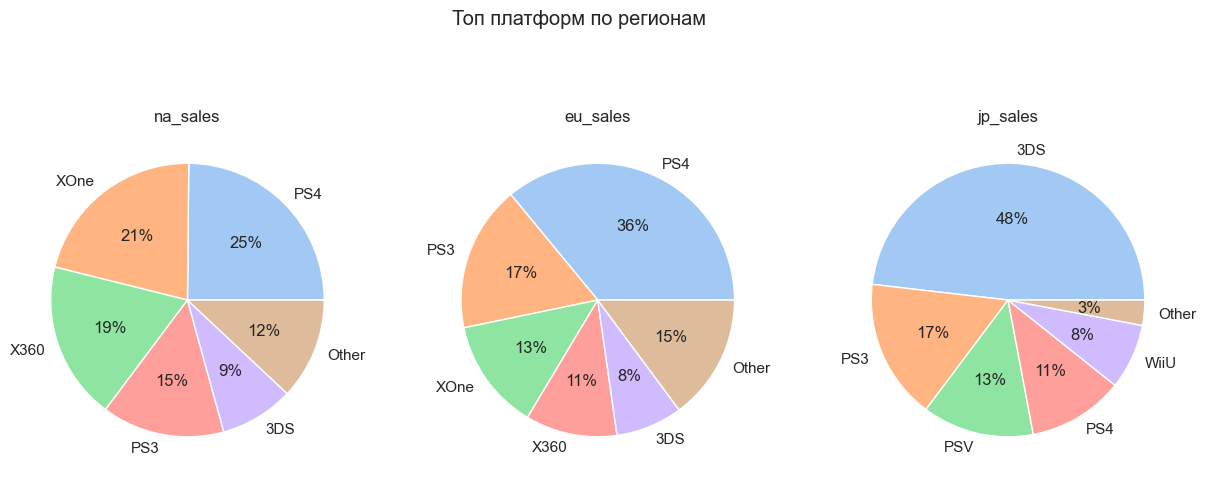

In [62]:
# рассчитаем распределение продаж по регионам
region_list = ['na_sales', 'eu_sales', 'jp_sales']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
axes = [ax1, ax2, ax3]
fig.suptitle('Топ платформ по регионам')
for i in [0, 1, 2]:
    platform_by_region = data_2013.groupby('platform')[region_list[i]].sum().sort_values(ascending=False)
    other = data_2013.groupby('platform')[region_list[i]].sum().sort_values(ascending=False)[5:].sum()
    platform_by_region = platform_by_region[:5]
    platform_by_region['Other'] = other
    
    
    colors = sns.color_palette('pastel')[ 0:6 ]
    axes[i].set_title(region_list[i])
    axes[i].pie(platform_by_region, labels = platform_by_region.index, colors = colors, autopct='%.0f%%')
    


**Вывод:**

Во всех регионах продажи платформ за актуальный период отличаются. 
- В Северной Америке популярны XOne и PS4
- В Европе популярны PS4 и PS3 соответственно
- В Японии распределение популярных платформ сильно отличается от других регионов. Там популярны 3DS, PS3, PSV

Различия в объемах продаж обусловленны,предпочтениями аудитории, сроком жизни платформ, их текущнй популярностью.

### Топ жанров по регионам

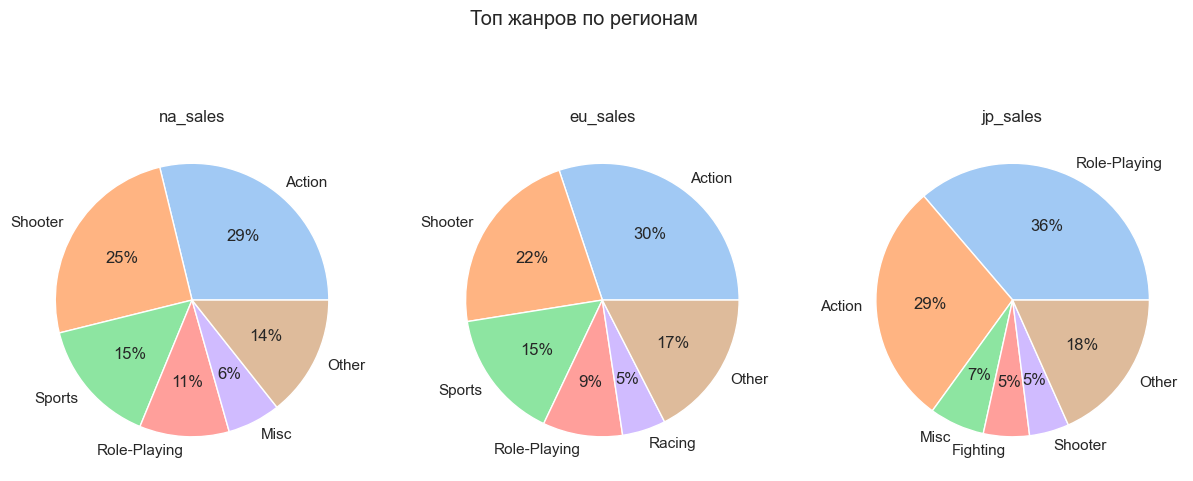

In [63]:
# расчитаем распределение жанров по продажам в регионах
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
axes = [ax1, ax2, ax3]
fig.suptitle('Топ жанров по регионам')
for i in [0, 1, 2]:
    platform_by_genre = data_2013.groupby('genre')[region_list[i]].sum().sort_values(ascending=False)
    other = data_2013.groupby('genre')[region_list[i]].sum().sort_values(ascending=False)[5:].sum()
    platform_by_genre = platform_by_genre[:5]
    platform_by_genre['Other'] = other
    
    
    colors = sns.color_palette('pastel')[ 0:6 ]
    axes[i].set_title(region_list[i])
    axes[i].pie(platform_by_genre, labels = platform_by_genre.index, colors = colors, autopct='%.0f%%')

**Вывод:**

Здесь также видим отличие региона Японии от других. Если везде наиболее популярными жанрами являютcя Action, Shooter, Sports, то в Японии это Role-Playing, Action.

Различие обусловлено культурной разницей и игровыми предпочтениями японцев.

### Распределение рейтингов по регионам

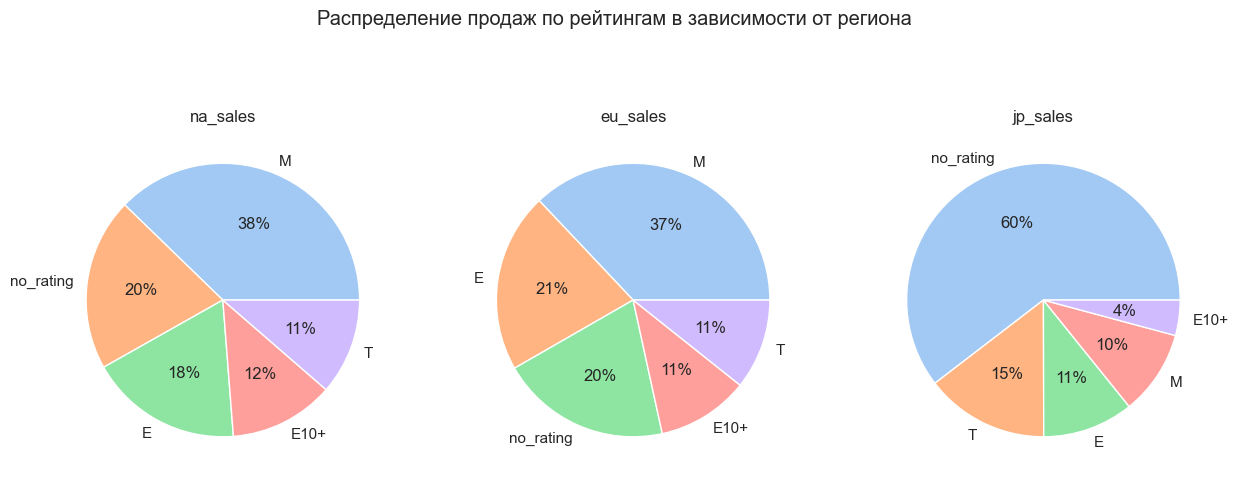

In [64]:
# расчитаем распределение продаж по рейтингам в зависимости от региона
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
axes = [ax1, ax2, ax3]
fig.suptitle('Распределение продаж по рейтингам в зависимости от региона')
for i in [0, 1, 2]:
    sales_by_rating = data_2013.groupby('rating')[region_list[i]].sum().sort_values(ascending=False)
       
    colors = sns.color_palette('pastel')[ 0:6 ]
    axes[i].set_title(region_list[i])
    axes[i].pie(sales_by_rating, labels = sales_by_rating.index, colors = colors, autopct='%.0f%%')
    

In [65]:
# Комментарий ревьюера
temp = data_2013.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_rating    977
M            369
T            333
E            302
E10+         252
Name: rating, dtype: int64

**Вывод:**

Опять же получается схожая картина по регионам Северная Америка и Европа: наибольшие продажи у игр с рейтингом M,E и с отсутствием рейтинга. Интересно,что игры с более взрослым рейтингом в этих ригонах продаются лучше.

В Японии большая часть игр продается без рейтинга, так как он для Америки и Канады. Поэтому для региона Японии судить о влиянии рейтинга на продажи нельзя.




## Проверка гипотез

### Пользовательские рейтинги платформ XOne и PC равны

Нулевая гипотеза **H0**: средние пользовательских рейтингов платформ XOne и PC равны.

Альтернативная гипотеза **H1**: средние пользовательских рейтингов платформ XOne и PC не равны.



In [66]:
# формирум выборки для проверки гипотезы 
xbox_user_rating = data_2013.query('platform =="XOne" & user_score > 0')['user_score'].reset_index(drop=True) 
pc_user_rating = data_2013.query('platform =="PC" & user_score > 0')['user_score'].reset_index(drop=True) 

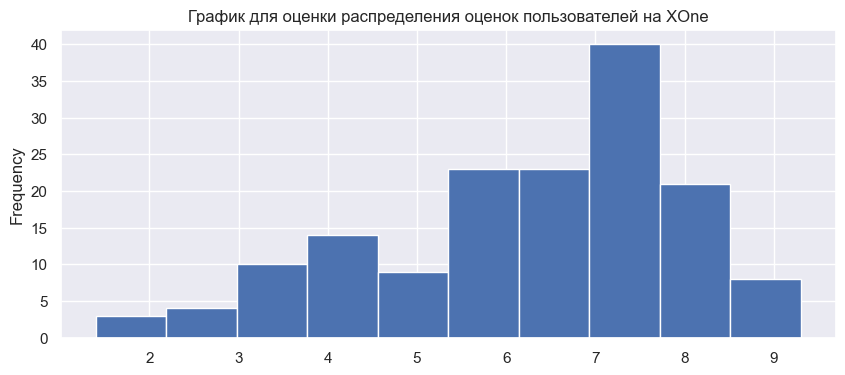

In [67]:
pc_user_rating.plot(kind='hist', title='График для оценки распределения оценок пользователей на XOne', figsize=(10,4))
plt.show()

In [68]:
pc_user_rating.count()

155

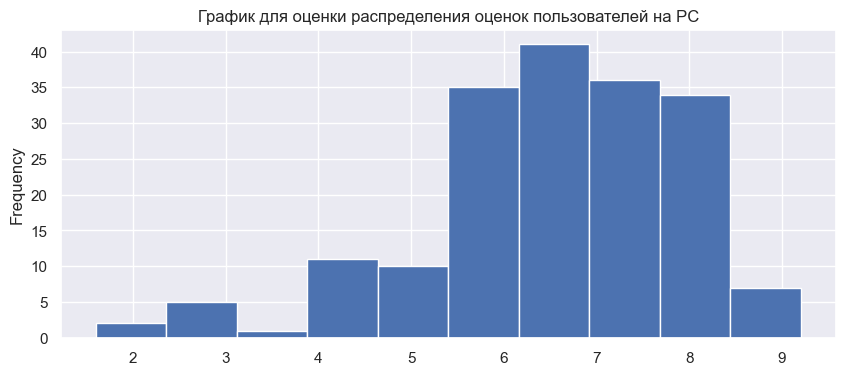

In [69]:
xbox_user_rating.plot(kind='hist', title='График для оценки распределения оценок пользователей на PC',figsize=(10,4))
plt.show()

In [70]:
xbox_user_rating.count()

182

##### Здесь мы проверяем гипотезу о равенстве средних двух генеральных совокупностей по выборкам из них. Распределение величин в выборках близко к нормальному.
Выборки независимы. Предположить, что обе выборки имеют равную дисперсию мы не можем, поэтому применяем t-критерий Уэлча. 



Уровень значимости *a* принимаем равным 0,05. Так как наши выборки содержат 150-200 значений. При увеличении размера выборок снижается вероятность совершить ошибку 1 рода, то есть неверно отвергнуть нулевую гипотезу.

In [71]:
alpha = 0.05
results = st.ttest_ind(pc_user_rating, xbox_user_rating, equal_var = False)

if results.pvalue < alpha:
    print('p-значение: ', results.pvalue)
    print('Отвергаем нулевую гипотезу и принимаем альтернативную: средние пользовательских рейтингов платформ XOne и PC не равны.')
else:
    print('p-значение: ', results.pvalue)
    print('Нулевая гипотеза верна: средние пользовательских рейтингов платформ XOne и PC равны.')

p-значение:  0.14759594013430463
Нулевая гипотеза верна: средние пользовательских рейтингов платформ XOne и PC равны.


In [72]:
# рассчитаем средние пользовательские рейтинги XOne и PC для проверки непротиворечивости гипотезы
print(pc_user_rating.mean())
xbox_user_rating.mean()

6.2696774193548395


6.521428571428572

### Пользовательские рейтинги жанров Action и Sports не равны

Нулевая гипотеза **H0**:  средние пользовательских рейтингов жанров Action и Sports равны.

Альтернативная гипотеза **H1**: средние пользовательских рейтингов жанров Action и Sports не равны.



In [73]:
# формирум выборки для проверки гипотезы 
action_user_rating = data_2013.query('genre =="Action" & user_score > 0')['user_score'].reset_index(drop=True) 
sports_user_rating = data_2013.query('genre =="Sports" & user_score > 0')['user_score'].reset_index(drop=True) 

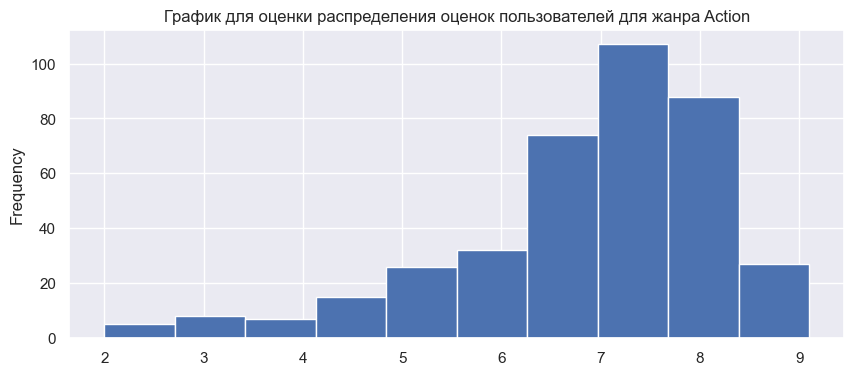

In [74]:
action_user_rating.plot(kind='hist', title='График для оценки распределения оценок пользователей для жанра Action', 
                        figsize=(10,4))
plt.show()

In [75]:
action_user_rating.count()

389

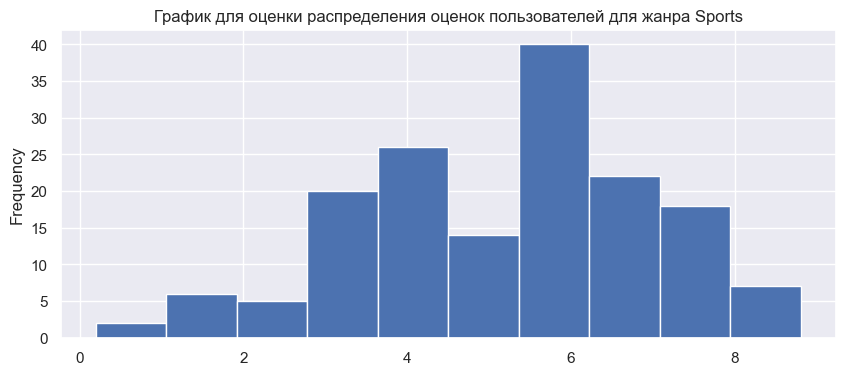

In [76]:
sports_user_rating.plot(kind='hist', title='График для оценки распределения оценок пользователей для жанра Sports',
                        figsize=(10,4))
plt.show()

In [77]:
sports_user_rating.count()

160

Здесь мы проверяем гипотезу о равенстве средних двух генеральных совокупностей по выборкам из них. Распределение величин в выборках близко к нормальному.
Выборки независимы. Предположить, что обе выборки имеют равную дисперсию мы не можем, поэтому применяем t-критерий Уэлча.

Уровень значимости *a* принимаем равным 0,05. Так как нажи выборки содержат примерно по 400 значенийю.



In [78]:
alpha = 0.05
results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var = False)

if results.pvalue < alpha:
    print('p-значение: ', results.pvalue)
    print('Отвергаем нулевую гипотезу и принимаем альтернативную: средние пользовательских рейтингов жанров Action и Sports не равны.')
else:
    print('p-значение: ', results.pvalue)
    print('Нулевая гипотеза верна: средние пользовательских рейтингов жанров Action и Sports равны.')

p-значение:  1.4460039700704318e-20
Отвергаем нулевую гипотезу и принимаем альтернативную: средние пользовательских рейтингов жанров Action и Sports не равны.


In [79]:
# рассчитаем средние пользовательские рейтинги жанров Action и Sports для проверки непротиворечивости гипотезы
print(action_user_rating.mean())
sports_user_rating.mean()

6.837532133676092


5.238124999999999

## Общий вывод

Нашей целью было определить, что влияет на продажи игр для целей прогнозирования.

В ходе проекта мы выяснили:
- **на динамику продаж влияет дата выхода самой платфомы.** В среднем срок жизни платформы составляет 10 лет. Из низ 5 лет роста продаж, 5 лет падения. Всвязи с этим выделяются несколько новых платформ, на которых можно ожидать роста продаж - **PS4, XOne и WiiU.**            
 
 
- **на количество продаж влияет динамика продаж игр от года к году.** Здесь у нас лидерами являются 2 платформы:  **PS4  и XOne**          


- **количество продаж игр зависит от оценок критиков, хотя зависимость и не очень сильная.**    


- **PS4 является самой перспективной платформой во всем мире.**       
Есть отличия по региона в популярности платформ: в Северной Америке продажи игр для PS4 и  XOne примерно равны, в Европе явный лидер PS4, в Японии ожидается рост популярности PS4 и WiiU.      


- есть зависимоть продаж от жанров. Так игры жанров Action, Shooter, Sports продаются большим числом копий в Северной Америке и Европе. Игры жанра Role_playing  и Action лучше продаются в Японии.      
Вцелом **наиболее популярными в мире жанрами являются Action и Shooter.**
Жанры Puzzle, Adventure, Strategy - наименнее популярны. 


- есть зависимость от рейтинга. Так **большим количеством копий в Северной Америке и Европе продаются игры с более взрослыми рейтингами - М и E.**     
Рейтинг ESRB присваивается в странах Северной Америки. Поэтому набольшее число проданных игр в Японии не имеют рейтинга ESRB, что может говорить о том,  что в этой стране/регионе популярны игры которые не выпускаюся в Северной Америке, а выпускаются только для внутреннего рынка.   

Также мы проверили две гипотезы и пришли к выводам:


- пользовательские рейтинги платформ XOne и PC равны

- пользовательские рейтинги жанров Action и Sports не равны. Средняя оценка пользователей отличается для игр этих двух жанров. Оценка игр жанра action выше почти на 1,5 балла. 

**Таким образом наиболее перспективными являются игры игры жанров Action и Shooter, для регионов Северная Америка и Европа, с рейтином М, для платформ PS4 и XOne, и желательно высоко оцененные критиками.**